# Метрики

In [1]:
%ls

metrics.ipynb  src/


In [2]:
%cd ../data_loader/src

/Users/socratis/PycharmProjects/intern_task_VK/data_loader/src


In [3]:
from data_loader import DataLoader

data_loader = DataLoader()
df = data_loader.load_data()

In [4]:
%cd ../../data_preprocessing/src

/Users/socratis/PycharmProjects/intern_task_VK/data_preprocessing/src


In [5]:
from data_preprocessing import DataPreprocessor

data_prep = DataPreprocessor()
y, data, X_train, X_test, y_train, y_test, X_train_rus, X_test_rus, y_train_rus, y_test_rus = data_prep.preprocess_data(df)

In [6]:
%cd ../../XGBoost/src/

/Users/socratis/PycharmProjects/intern_task_VK/XGBoost/src


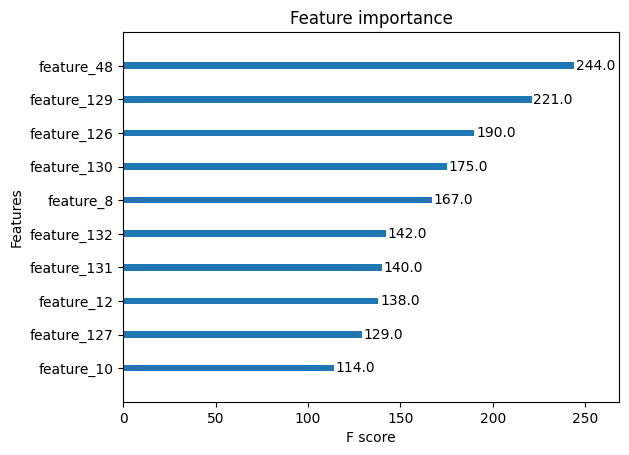

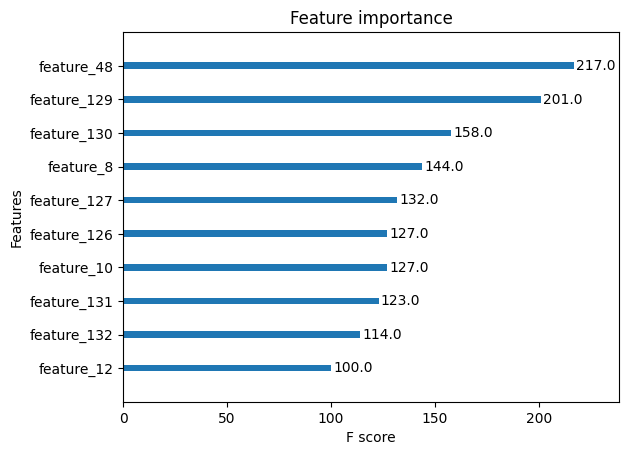

In [25]:
from XGBoost import XGBoost_models

XGB_models = XGBoost_models()
predict_no_balance, visual_no_balance = XGB_models.XGBoost_no_balance(X_train, y_train, X_test)
predict_rus, visual_rus = XGB_models.XGBoost_no_balance(X_train_rus, y_train_rus, X_test_rus)

In [8]:
%cd ../../CatBoost/src/

/Users/socratis/PycharmProjects/intern_task_VK/CatBoost/src


In [13]:
from CatBoost import CatBoost_models

CB_models = CatBoost_models()
y_pred_no_balance = CB_models.CatBoost_no_balance(X_train, y_train, X_test)
y_pred_rus = CB_models.CatBoost_no_balance(X_train_rus, y_train_rus, X_test_rus)

0:	learn: 0.7504626	total: 153ms	remaining: 15.2s
1:	learn: 0.7504142	total: 327ms	remaining: 16s
2:	learn: 0.7503714	total: 526ms	remaining: 17s
3:	learn: 0.7503335	total: 653ms	remaining: 15.7s
4:	learn: 0.7503039	total: 779ms	remaining: 14.8s
5:	learn: 0.7502765	total: 868ms	remaining: 13.6s
6:	learn: 0.7502268	total: 990ms	remaining: 13.2s
7:	learn: 0.7501790	total: 1.08s	remaining: 12.5s
8:	learn: 0.7501388	total: 1.2s	remaining: 12.1s
9:	learn: 0.7501051	total: 1.38s	remaining: 12.5s
10:	learn: 0.7500532	total: 1.55s	remaining: 12.5s
11:	learn: 0.7500154	total: 1.64s	remaining: 12s
12:	learn: 0.7499681	total: 1.75s	remaining: 11.7s
13:	learn: 0.7499202	total: 1.88s	remaining: 11.5s
14:	learn: 0.7498683	total: 2.05s	remaining: 11.6s
15:	learn: 0.7498375	total: 2.16s	remaining: 11.3s
16:	learn: 0.7498043	total: 2.23s	remaining: 10.9s
17:	learn: 0.7497756	total: 2.38s	remaining: 10.8s
18:	learn: 0.7497492	total: 2.44s	remaining: 10.4s
19:	learn: 0.7497117	total: 2.51s	remaining: 10s

## NDCG_5

In [16]:
from sklearn.metrics import ndcg_score

##### NDCG_5 для XGBoost без сбалансирования

In [17]:
ndcg_5_score = ndcg_score(y_test.values.reshape(1, -1), predict_no_balance.reshape(1, -1), k=5)
print("NDCG@5 для XGBoost без сбалансирования:", round(ndcg_5_score, 2))

NDCG@5 для XGBoost без сбалансирования: 0.55


##### NDCG_5 для XGBoost с Undersampling

In [26]:
ndcg_5_score = ndcg_score(y_test_rus.values.reshape(1, -1), predict_rus.reshape(1, -1), k=5)
print("NDCG@5 для XGBoost с Undersampling:", round(ndcg_5_score, 2))

NDCG@5 для XGBoost с Undersampling: 0.72


##### NDCG_5 для CatBoost без сбалансирования

In [19]:
ndcg_5_score = ndcg_score(y_test.values.reshape(1, -1), y_pred_no_balance.reshape(1, -1), k=5)
print("NDCG@5 для CatBoost без сбалансирования:", round(ndcg_5_score, 2))

NDCG@5 для CatBoost без сбалансирования: 0.33


##### NDCG_5 для CatBoost с Undersampling

In [20]:
ndcg_5_score = ndcg_score(y_test_rus.values.reshape(1, -1), y_pred_rus.reshape(1, -1), k=5)
print("NDCG@5 для CatBoost с Undersampling:", round(ndcg_5_score, 2))

NDCG@5 для CatBoost с Undersampling: 0.77


## ERR

In [28]:
def ERR(ranks, max_rank=None):
    if not max_rank:
        max_rank = len(ranks)
    ERR_score = 0.0
    p = 1.0
    for rank in range(1, min(len(ranks), max_rank) + 1):
        R = ranks[rank - 1]
        ERR_score += p * R / rank
        p *= (1 - R)
    return ERR_score

##### ERR для XGBoost без сбалансирования

In [38]:
print('ERR для XGBoost без сбалансирования:', round(ERR(predict_no_balance), 2))

ERR для XGBoost без сбалансирования: nan


/var/folders/cr/0fzq0bwx2pngt4ykckw13q1c0000gn/T/ipykernel_47877/2866924606.py:9: RuntimeWarning: overflow encountered in scalar multiply
  p *= (1 - R)
/var/folders/cr/0fzq0bwx2pngt4ykckw13q1c0000gn/T/ipykernel_47877/2866924606.py:8: RuntimeWarning: invalid value encountered in scalar add
  ERR_score += p * R / rank


##### ERR для CatBoost без сбалансирования

In [34]:
print('ERR для CatBoost без сбалансирования:', round(ERR(y_pred_no_balance), 2))

ERR для CatBoost без сбалансирования: 0.77


##### ERR для CatBoost с Undersampling

In [35]:
print('ERR для CatBoost с Undersampling:', round(ERR(y_pred_rus), 2))

ERR для CatBoost с Undersampling: 1.39
